In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical  #to one hot encode labels
import pickle

In [145]:
data = pd.read_excel('knowledgebase.xlsx')
data

,Response ID,Response Title,Question Variations,Unnamed: 3
0,1,What is a novel coronavirus?,What is a novel coronavirus,NaN
1,1,What is a novel coronavirus?,what is coronavirus,NaN
2,1,What is a novel coronavirus?,what is coronavirus,NaN
3,1,What is a novel coronavirus?,coronavirus,NaN
4,1,What is a novel coronavirus?,coronavirus,NaN
...,...,...,...,...
545,11,Am I at risk for novel coronavirus from a pack...,products exposed to coronavirus,NaN
546,11,Am I at risk for novel coronavirus from a pack...,i just bought goods from china,NaN
547,11,Am I at risk for novel coronavirus from a pack...,sealed container shipment coronavirus,NaN
548,11,Am I at risk for novel coronavirus from a pack...,sealed shipment from china,NaN


In [146]:
#get the labels
data['labels'] = data['Response ID']-1
data['labels']

0       0
1       0
2       0
3       0
4       0
       ..
545    10
546    10
547    10
548    10
549    10
Name: labels, Length: 550, dtype: int64

In [147]:
#word vectorizer
vectorizer = CountVectorizer(max_features=10000)

In [148]:
#fit the questions data to get the word dictionary
X = vectorizer.fit_transform(data['Question Variations'])

In [149]:
#list of words found in the QVs
vectorizer.get_feature_names()

['19',
 '2019',
 '2020',
 'about',
 'acceptable',
 'aches',
 'action',
 'actions',
 'after',
 'against',
 'air',
 'airborne',
 'alarm',
 'alcohol',
 'am',
 'an',
 'and',
 'animal',
 'animals',
 'another',
 'antibiotics',
 'any',
 'anything',
 'are',
 'asia',
 'asian',
 'at',
 'authorities',
 'avoid',
 'away',
 'bacterial',
 'bat',
 'bats',
 'be',
 'being',
 'bleach',
 'block',
 'blood',
 'body',
 'bought',
 'breath',
 'breathing',
 'buy',
 'by',
 'came',
 'can',
 'canada',
 'carries',
 'cats',
 'cause',
 'caused',
 'cdc',
 'chances',
 'china',
 'chinese',
 'cleaning',
 'close',
 'come',
 'community',
 'compared',
 'complications',
 'contact',
 'contacted',
 'container',
 'containing',
 'contaminated',
 'contamination',
 'contracting',
 'corona',
 'coronavirus',
 'cough',
 'coughed',
 'coughing',
 'countries',
 'cov',
 'covid',
 'crowded',
 'cure',
 'cured',
 'current',
 'deadly',
 'delivery',
 'detect',
 'detecting',
 'determine',
 'determining',
 'did',
 'die',
 'different',
 'dilemma

In [150]:
#show the total number of words vectorized
type(vectorizer.get_feature_names())

list

In [151]:
#convert to an array
X = X.toarray()

In [152]:
#check frequency of words
print(X.sum(axis=0))

[  4   9   3   5   1   1   3   5   9   9   2   4   1   1   3   1   7   2
   4   1   1   1   1  16   2   1   2   1   1   1   1   1   3   3   4   1
   2   2   4   1   3   2   1   4   1   7   1   1   1   4   2  31   4  33
   9   1   4  12   2   1   4  11   1   2   2   8   3   1  12 189   5   1
   4   1   1  34   2  10   1   2   1   1   1   1   4   2  24   1   1   1
   3   1   1   1  22  21   1   8   1   2   1   1   1   1   1   2   1   1
   1   1   2   1   1   1   1   2   2   1   2   2   1   2   1   4   4   1
   1   1   5  40   1   1   9   1   4   1   1   4  50   1   1  67   2   1
   7   1   1   1   1  11   2   1   2   2   2  13   1   1   1  11   1   1
   2  47   3   2   1  15   7   1   1   2  23   1  21  10   2   3   1  44
   2   2  11   2   1   1   2   1   3   4   2   1   1   1   1   1   1   1
   1  11  16   8   2   1   1   1   1   1   5   1  24   2   5   3   2   1
   2   3  44   1   3   1   5   1   6   1   3  18   9   1   2   5   1   2
   7   1   1   2   1  23   1   1   1   1   2   5   

In [153]:
#get labels
y = data['labels']
y

0       0
1       0
2       0
3       0
4       0
       ..
545    10
546    10
547    10
548    10
549    10
Name: labels, Length: 550, dtype: int64

In [154]:
#check first to see how many of each
y.value_counts()

10    50
9     50
8     50
7     50
6     50
5     50
4     50
3     50
2     50
1     50
0     50
Name: labels, dtype: int64

In [212]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)

In [213]:
#checking for stratified data
y_test.value_counts()

6     8
7     7
5     7
3     6
2     6
10    5
9     5
8     3
4     3
0     3
1     2
Name: labels, dtype: int64

In [214]:
#one hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [215]:
X_train.shape

(495, 385)

In [216]:
X_test.shape

(55, 385)

In [217]:
y_train.shape

(495, 11)

In [218]:
y_test.shape

(55, 11)

In [219]:
X_train[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [298]:
vectorizer.get_feature_names()[365]

'vitamins'

In [299]:
# save the vector to pickle
with open("cv_vector.pickle","wb") as file:
    pickle.dump(vectorizer, file)

In [300]:
# loading the vector pickls
pickle_in = open("cv_vector.pickle","rb")
vec = pickle.load(pickle_in)

In [303]:
test = vec.transform(['coronavirus'])
print(test.toarray())

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [221]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Setting up the model

In [171]:
from keras import models
from keras import layers

In [222]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(385,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

In [223]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [224]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_test, y_test))

Train on 495 samples, validate on 55 samples
Epoch 1/50
495/495 [==============================] - 0s 367us/step - loss: 2.3979 - accuracy: 0.1071 - val_loss: 2.3840 - val_accuracy: 0.1818
Epoch 2/50
495/495 [==============================] - 0s 36us/step - loss: 2.3707 - accuracy: 0.1758 - val_loss: 2.3692 - val_accuracy: 0.2182
Epoch 3/50
495/495 [==============================] - 0s 40us/step - loss: 2.3489 - accuracy: 0.2101 - val_loss: 2.3525 - val_accuracy: 0.2364
Epoch 4/50
495/495 [==============================] - 0s 38us/step - loss: 2.3231 - accuracy: 0.2222 - val_loss: 2.3320 - val_accuracy: 0.3091
Epoch 5/50
495/495 [==============================] - 0s 40us/step - loss: 2.2924 - accuracy: 0.2485 - val_loss: 2.3031 - val_accuracy: 0.3273
Epoch 6/50
495/495 [==============================] - 0s 40us/step - loss: 2.2475 - accuracy: 0.2970 - val_loss: 2.2679 - val_accuracy: 0.3636
Epoch 7/50
495/495 [==============================] - 0s 39us/step - loss: 2.2101 - accuracy: 0.

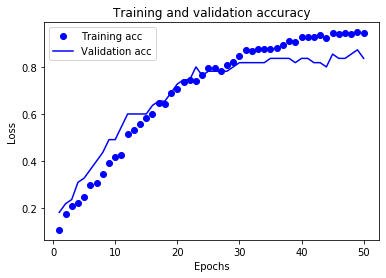

In [225]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Train model with all the data

In [229]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(385,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                24704     
_________________________________________________________________
dense_84 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 11)                715       
Total params: 33,739
Trainable params: 33,739
Non-trainable params: 0
_________________________________________________________________


In [232]:
y = to_categorical(y)
y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [233]:
history = model.fit(X,
                    y,
                    epochs=50,
                    batch_size=128)

Epoch 1/50
550/550 [==============================] - 0s 247us/step - loss: 2.3928 - accuracy: 0.1164
Epoch 2/50
550/550 [==============================] - 0s 36us/step - loss: 2.3699 - accuracy: 0.1764
Epoch 3/50
550/550 [==============================] - 0s 46us/step - loss: 2.3493 - accuracy: 0.2145
Epoch 4/50
550/550 [==============================] - 0s 44us/step - loss: 2.3176 - accuracy: 0.2709
Epoch 5/50
550/550 [==============================] - 0s 32us/step - loss: 2.2902 - accuracy: 0.2891
Epoch 6/50
550/550 [==============================] - 0s 33us/step - loss: 2.2411 - accuracy: 0.3145
Epoch 7/50
550/550 [==============================] - 0s 38us/step - loss: 2.2069 - accuracy: 0.3327
Epoch 8/50
550/550 [==============================] - 0s 34us/step - loss: 2.1415 - accuracy: 0.3327
Epoch 9/50
550/550 [==============================] - 0s 33us/step - loss: 2.0812 - accuracy: 0.3873
Epoch 10/50
550/550 [==============================] - 0s 49us/step - loss: 2.0071 - accur

### Testing the model

In [108]:
question = ["how do i protect myself against the virus?"]
question = vectorizer.transform(question)
question = question.toarray()
question

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [110]:
prediction = model.predict(question)
print(np.argmax(prediction[0]))

3


In [234]:
#label classes
class_names = [
    'What is a novel coronavirus?',
    'What is the source of 2019-nCoV?',
    'How does the virus spread?',
    'How can I help protect myself?',
    'Is there a treatment for the infection?',
    'What do I do if I feel sick?',
    'Does CDC recommend the use of facemask in the community to prevent 2019-nCoV?',
    'What are the symptoms and complications that 2019-nCoV can cause?',
    'How do you test a person for 2019-nCoV?',
    'What is CDC doing about 2019-nCoV?',
    'Am I at risk for novel coronavirus from a package or products shipping from China?']
class_names

['What is a novel coronavirus?',
 'What is the source of 2019-nCoV?',
 'How does the virus spread?',
 'How can I help protect myself?',
 'Is there a treatment for the infection?',
 'What do I do I feel sick?',
 'Does CDC recommend the use of facemask in the community to prevent 2019-nCoV?',
 'What are the symptoms and complications that 2019-nCoV can cause?',
 'How do you test a person for 2019-nCoV?',
 'What is CDC doing about 2019-nCoV?',
 'Am I at risk for novel coronavirus from a package or products shipping from China?']

In [112]:
#printing the response
print(class_names[np.argmax(prediction[0])])

How can I help protect myself?


In [242]:
def askQuestion(question):
    qtn = vectorizer.transform([question])
    qtn = qtn.toarray()
    prediction = model.predict(qtn)
    print(question)
    print("confidence: " + str(np.amax(prediction[0])))
    print(class_names[np.argmax(prediction[0])])

In [243]:
askQuestion("whats the cause of corona virus")

whats the cause of corona virus
confidence: 0.9980751
What is the source of 2019-nCoV?


In [244]:
askQuestion("why do we need to self-isolate?")

why do we need to self-isolate?
confidence: 0.99940395
What do I do I feel sick?


In [275]:
askQuestion("how do i know if i have coronavirus")

how do i know if i have coronavirus
confidence: 0.99100566
What are the symptoms and complications that 2019-nCoV can cause?


In [246]:
askQuestion("where should I go if i have coronavirus")

where should I go if i have coronavirus
confidence: 0.5110768
What do I do I feel sick?


In [247]:
askQuestion("what should i do if im infected")

what should i do if im infected
confidence: 0.9703916
What do I do I feel sick?


In [248]:
askQuestion("how do i know im infected?")

how do i know im infected?
confidence: 0.8059591
What do I do I feel sick?


In [262]:
askQuestion("are my delivery safe")

are my delivery safe
confidence: 0.5149926
Am I at risk for novel coronavirus from a package or products shipping from China?


In [289]:
askQuestion("symptoms from the virus")

symptoms from the virus
confidence: 0.99676394
What are the symptoms and complications that 2019-nCoV can cause?


In [279]:
askQuestion("i'm sick")

i'm sick
confidence: 0.84525436
What do I do I feel sick?


In [297]:
askQuestion("im sick")

im sick
confidence: 0.9744425
What do I do I feel sick?


In [286]:
# saving to pickle
with open("covid19_virtual_agent.pickle","wb") as file:
    pickle.dump(model, file)

In [287]:
# loading a pickle
pickle_in = open("covid19_virtual_agent.pickle","rb")
virtual_agent_model = pickle.load(pickle_in)

In [288]:
virtual_agent_model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                24704     
_________________________________________________________________
dense_84 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_86 (Dense)             (None, 11)                715       
Total params: 33,739
Trainable params: 33,739
Non-trainable params: 0
_________________________________________________________________
